**Project**

Candlestick pattern

## Import Libraries

In [93]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
import pandas_ta as ta

## Import Dataset

In [94]:
# define asset and date
ticker_name = 'BTC-USD'
start='2021-01-01' 
end='2021-6-30'

In [95]:
raw_df = yf.download(tickers=ticker_name, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


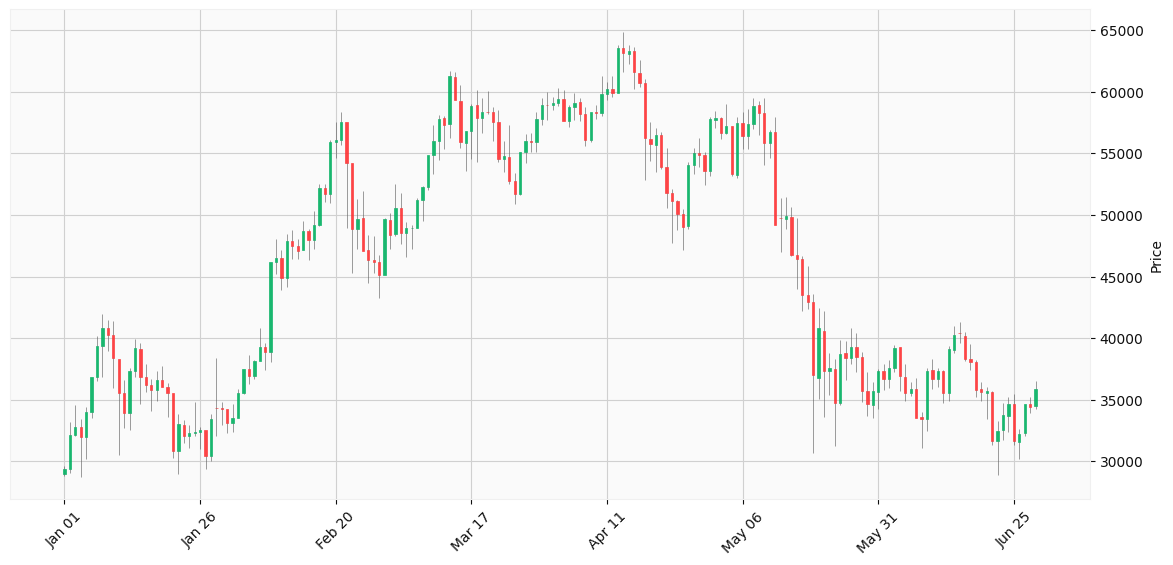

In [96]:
mpf.plot(raw_df, style='yahoo', type='candle', figsize=(15, 7))

In [97]:
# define buy sell signal by candlestick pattern
buy_signal = ["hammer", "invertedhammer"]
sell_signal = ["hangingman", "shootingstar"]

all_signal = buy_signal + sell_signal

raw_df.ta.cdl_pattern(name=all_signal, append=True)
raw_df

,Open,High,Low,Close,Adj Close,Volume,CDL_HAMMER,CDL_INVERTEDHAMMER,CDL_HANGINGMAN,CDL_SHOOTINGSTAR
Date,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,0.0,0.0,0.0,0.0
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,0.0,0.0,0.0,0.0
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,0.0,0.0,0.0,0.0
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,0.0,0.0,0.0,0.0
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-06-25,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,40230904226,0.0,0.0,0.0,0.0
2021-06-26,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,38585385521,0.0,0.0,0.0,0.0
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,0.0,0.0,0.0,0.0


In [98]:
# buy signal
raw_df.loc[(raw_df['CDL_HAMMER'] != 0) | (raw_df['CDL_INVERTEDHAMMER'] != 0), 'action'] = 'buy'

# sell signal
raw_df.loc[(raw_df['CDL_HANGINGMAN'] != 0) | (raw_df['CDL_SHOOTINGSTAR'] != 0), 'action'] = 'sell'

In [99]:
# create marker signal
raw_df.loc[raw_df['action'] == 'buy', 'marker_position'] = raw_df['Low'] * 0.95
raw_df.loc[raw_df['action'] == 'sell', 'marker_position'] = raw_df['High'] * 1.02

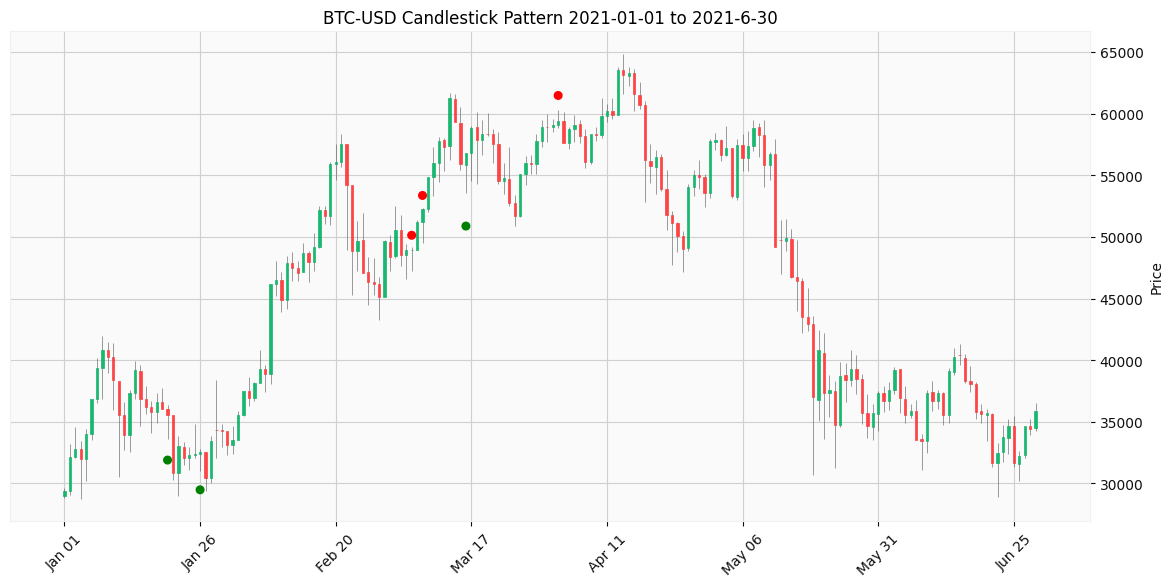

In [100]:
# define signal plot and color condition to marker
color_marker = ['green' if x == 'buy' else 'red' for x in raw_df['action']]
addpedplot = mpf.make_addplot(raw_df['marker_position'], type='scatter', markersize= 30, color=color_marker)

mpf.plot(   raw_df, style='yahoo', type='candle', addplot=addpedplot,figsize=(15, 7),
            axtitle=f'{ticker_name} Candlestick Pattern {start} to {end}')